In [1]:
# Import libraries

import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

pd.options.mode.chained_assignment = None


# Read the data

df = pd.read_csv(r'C:\Users\lisav\Downloads\movies.csv', encoding='cp1252') 

In [2]:
# View the data

df.head()

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year
0,8000000.0,Columbia Pictures Corporation,USA,Rob Reiner,Adventure,52287414.0,Stand by Me,R,1986-08-22,89,8.1,Wil Wheaton,299174,Stephen King,1986
1,6000000.0,Paramount Pictures,USA,John Hughes,Comedy,70136369.0,Ferris Bueller's Day Off,PG-13,1986-06-11,103,7.8,Matthew Broderick,264740,John Hughes,1986
2,15000000.0,Paramount Pictures,USA,Tony Scott,Action,179800601.0,Top Gun,PG,1986-05-16,110,6.9,Tom Cruise,236909,Jim Cash,1986
3,18500000.0,Twentieth Century Fox Film Corporation,USA,James Cameron,Action,85160248.0,Aliens,R,1986-07-18,137,8.4,Sigourney Weaver,540152,James Cameron,1986
4,9000000.0,Walt Disney Pictures,USA,Randal Kleiser,Adventure,18564613.0,Flight of the Navigator,PG,1986-08-01,90,6.9,Joey Cramer,36636,Mark H. Baker,1986


In [3]:
# Check for missing data

for col in df.columns:
    n_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(n_missing*100)))

budget - 0%
company - 0%
country - 0%
director - 0%
genre - 0%
gross - 0%
name - 0%
rating - 0%
released - 0%
runtime - 0%
score - 0%
star - 0%
votes - 0%
writer - 0%
year - 0%


In [4]:
# Check data types

df.dtypes

budget      float64
company      object
country      object
director     object
genre        object
gross       float64
name         object
rating       object
released     object
runtime       int64
score       float64
star         object
votes         int64
writer       object
year          int64
dtype: object

In [5]:
# Change data types

df['budget'] = df['budget'].astype('int64')
df['gross'] = df['gross'].astype('int64')

In [6]:
# Create a column with correct year values (because 'year' and 'released' don't always match)

df['year_adj'] = df['released'].astype(str).str[:4]
df['year_adj'] = df['year_adj'].astype('int64')

In [7]:
# Display all data

pd.set_option('display.max_rows', None)
df.sort_values(by=['gross'], inplace=False, ascending=False).head(10)   # remove .head() to view all data

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year,year_adj
6380,245000000,Lucasfilm,USA,J.J. Abrams,Action,936662225,Star Wars: The Force Awakens,PG-13,2015-12-18,136,8.1,Daisy Ridley,687192,Lawrence Kasdan,2015,2015
5061,237000000,Twentieth Century Fox Film Corporation,UK,James Cameron,Action,760507625,Avatar,PG-13,2009-12-18,162,7.8,Sam Worthington,954412,James Cameron,2009,2009
2420,200000000,Twentieth Century Fox Film Corporation,USA,James Cameron,Drama,658672302,Titanic,PG-13,1997-12-19,194,7.8,Leonardo DiCaprio,862554,James Cameron,1997,1997
6391,150000000,Universal Pictures,USA,Colin Trevorrow,Action,652270625,Jurassic World,PG-13,2015-06-12,124,7.0,Chris Pratt,469200,Rick Jaffa,2015,2015
5723,220000000,Marvel Studios,USA,Joss Whedon,Action,623357910,The Avengers,PG-13,2012-05-04,143,8.1,Robert Downey Jr.,1064633,Joss Whedon,2012,2012
4840,185000000,Warner Bros.,USA,Christopher Nolan,Action,534858444,The Dark Knight,PG-13,2008-07-18,152,9.0,Christian Bale,1839571,Jonathan Nolan,2008,2008
6614,200000000,Lucasfilm,USA,Gareth Edwards,Action,532177324,Rogue One,PG-13,2016-12-16,133,7.9,Felicity Jones,365473,Chris Weitz,2016,2016
6687,200000000,Pixar Animation Studios,USA,Andrew Stanton,Animation,486295561,Finding Dory,PG,2016-06-17,97,7.4,Ellen DeGeneres,173005,Andrew Stanton,2016,2016
2870,115000000,Lucasfilm,USA,George Lucas,Action,474544677,Star Wars: Episode I - The Phantom Menace,PG,1999-05-19,136,6.5,Ewan McGregor,584809,George Lucas,1999,1999
6398,250000000,Marvel Studios,USA,Joss Whedon,Action,459005868,Avengers: Age of Ultron,PG-13,2015-05-01,141,7.4,Robert Downey Jr.,537832,Joss Whedon,2015,2015


In [8]:
# Reset display options

pd.reset_option('display')

In [9]:
# Drop duplicates if exist

df.drop_duplicates()

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year,year_adj
0,8000000,Columbia Pictures Corporation,USA,Rob Reiner,Adventure,52287414,Stand by Me,R,1986-08-22,89,8.1,Wil Wheaton,299174,Stephen King,1986,1986
1,6000000,Paramount Pictures,USA,John Hughes,Comedy,70136369,Ferris Bueller's Day Off,PG-13,1986-06-11,103,7.8,Matthew Broderick,264740,John Hughes,1986,1986
2,15000000,Paramount Pictures,USA,Tony Scott,Action,179800601,Top Gun,PG,1986-05-16,110,6.9,Tom Cruise,236909,Jim Cash,1986,1986
3,18500000,Twentieth Century Fox Film Corporation,USA,James Cameron,Action,85160248,Aliens,R,1986-07-18,137,8.4,Sigourney Weaver,540152,James Cameron,1986,1986
4,9000000,Walt Disney Pictures,USA,Randal Kleiser,Adventure,18564613,Flight of the Navigator,PG,1986-08-01,90,6.9,Joey Cramer,36636,Mark H. Baker,1986,1986
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6815,0,Fox Searchlight Pictures,UK,Mandie Fletcher,Comedy,4750497,Absolutely Fabulous: The Movie,R,2016-07-22,91,5.4,Jennifer Saunders,9161,Jennifer Saunders,2016,2016
6816,0,Siempre Viva Productions,USA,Paul Duddridge,Drama,28368,Mothers and Daughters,PG-13,2016-05-06,90,4.9,Selma Blair,1959,Paige Cameron,2016,2016
6817,3500000,Warner Bros. Animation,USA,Sam Liu,Animation,3775000,Batman: The Killing Joke,R,2016-07-25,76,6.5,Kevin Conroy,36333,Brian Azzarello,2016,2016
6818,0,Borderline Presents,USA,Nicolas Pesce,Drama,25981,The Eyes of My Mother,R,2016-12-02,76,6.2,Kika Magalhães,6947,Nicolas Pesce,2016,2016


In [10]:
# Hypothesis: Budget is highly correlated with gross earnings

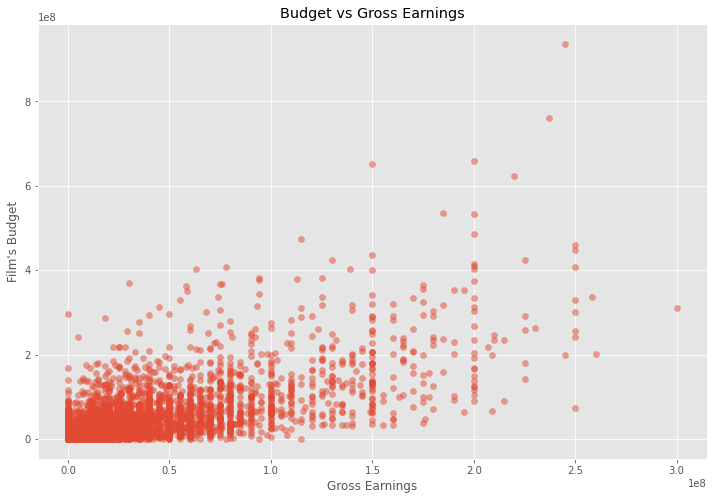

In [11]:
# Scartterplot of budget vs gross (Matplotlib)

plt.scatter(x=df['budget'], y=df['gross'], alpha = 0.5)
plt.title('Budget vs Gross Earnings')
plt.xlabel('Gross Earnings')
plt.ylabel("Film's Budget")
plt.show()

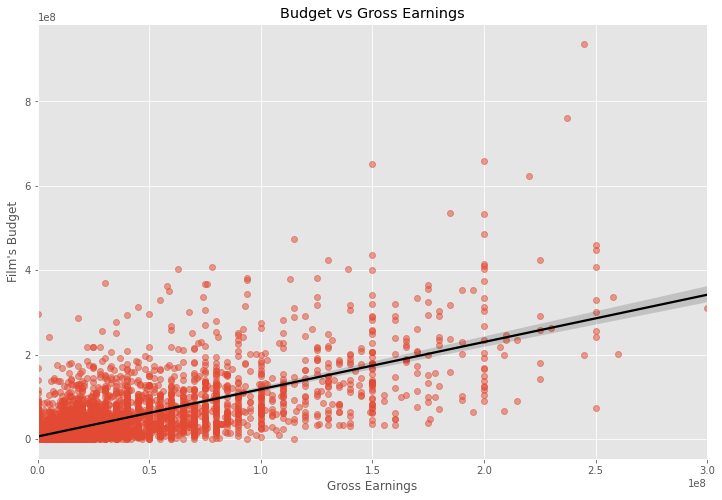

In [12]:
# Scartterplot of budget vs gross (Seaborn)

sns.regplot(x='budget', y='gross', data=df, line_kws={'color':'black'}, scatter_kws={'alpha':0.5})
plt.title('Budget vs Gross Earnings')
plt.xlabel('Gross Earnings')
plt.ylabel("Film's Budget")
plt.show()


In [13]:
# Correlation between numerical columns, pearson

corr_matrix = df.corr()
corr_matrix

,budget,gross,runtime,score,votes,year,year_adj
budget,1.000000,0.712196,0.268226,0.042145,0.503924,0.291009,0.274820
gross,0.712196,1.000000,0.224579,0.165693,0.662457,0.191548,0.176879
runtime,0.268226,0.224579,1.000000,0.395343,0.317399,0.087639,0.088342
score,0.042145,0.165693,0.395343,1.000000,0.393607,0.105276,0.117679
votes,0.503924,0.662457,0.317399,0.393607,1.000000,0.229304,0.220797
year,0.291009,0.191548,0.087639,0.105276,0.229304,1.000000,0.996229
year_adj,0.274820,0.176879,0.088342,0.117679,0.220797,0.996229,1.000000


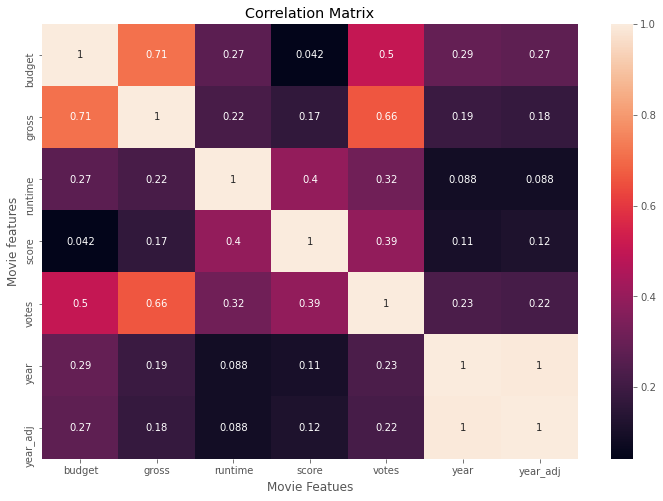

In [14]:
# Visualize correlation matrix using heat map

sns.heatmap(corr_matrix, annot=True)
plt.title('Correlation Matrix')
plt.xlabel('Movie Featues')
plt.ylabel('Movie features')
plt.show()

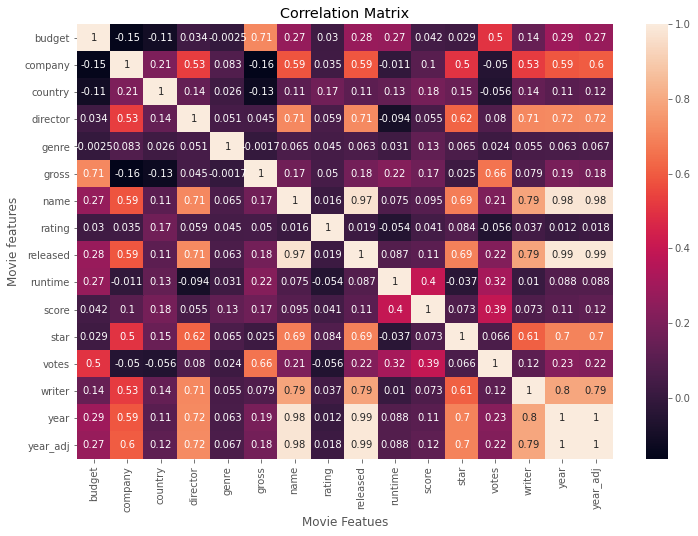

In [15]:
# Get the numeric representation of categorical variables by identifying distinct values
# Visualize correlation matrix using heat map


# Option 1 - using a loop

# df_num = df.copy()

# for col_name in df_num.columns:
#     if (df_num[col_name]).dtype == 'object':
#         df_num[col_name] = (df_num[col_name]).astype('category')
#         df_num[col_name] = df_num[col_name].cat.codes

# corr_matrix_full = df_num.corr()
# sns.heatmap(corr_matrix_full, annot=True)
# plt.title('Correlation Matrix')
# plt.xlabel('Movie Featues')
# plt.ylabel('Movie features')
# plt.show()


# Option 2 - using factorize and a lambda function

df_fc = df.copy()
df_fc[['company','country','director','genre','name','rating','released','star','writer']] = df_fc[['company','country','director','genre','name','rating','released','star','writer']].apply(lambda x: x.factorize()[0])
corr_matrix_full = df_fc.corr()

sns.heatmap(corr_matrix_full, annot=True)
plt.title('Correlation Matrix')
plt.xlabel('Movie Featues')
plt.ylabel('Movie features')
plt.show()

In [16]:
# Unstack correlations

corr_pairs = corr_matrix_full.unstack()
corr_pairs

budget    budget      1.000000
          company    -0.153719
          country    -0.107369
          director    0.033698
          genre      -0.002497
                        ...   
year_adj  star        0.698168
          votes       0.220797
          writer      0.794907
          year        0.996229
          year_adj    1.000000
Length: 256, dtype: float64

In [17]:
# Show correlations as sorted pairs

sorted_pairs = corr_pairs.sort_values(kind="quicksort")

print(sorted_pairs)


gross     company    -0.164628
company   gross      -0.164628
          budget     -0.153719
budget    company    -0.153719
gross     country    -0.125094
                        ...   
director  director    1.000000
country   country     1.000000
company   company     1.000000
year      year        1.000000
year_adj  year_adj    1.000000
Length: 256, dtype: float64


In [18]:
# Displayhigh correlation (> 0.5)

strong_pairs = sorted_pairs[abs(sorted_pairs) > 0.5]

print(strong_pairs)

votes     budget      0.503924
budget    votes       0.503924
writer    company     0.525347
company   writer      0.525347
          director    0.528937
                        ...   
director  director    1.000000
country   country     1.000000
company   company     1.000000
year      year        1.000000
year_adj  year_adj    1.000000
Length: 76, dtype: float64


In [19]:
# Votes and budget have the highest correlation with Gross Revenue

In [20]:
# Companies by Gross Revenue

CompanyGross = df.groupby(['company'])[["gross"]].sum()

CompanyGrossSorted = CompanyGross.sort_values(['gross','company'], ascending = False)[:15]

CompanyGrossSorted = CompanyGrossSorted['gross'].astype('int64') 

CompanyGrossSorted

company
Warner Bros.                              21322318408
Universal Pictures                        19430051320
Paramount Pictures                        17115702495
Twentieth Century Fox Film Corporation    14788570587
Walt Disney Pictures                      10455507123
Columbia Pictures                          8824216545
New Line Cinema                            8540112287
Columbia Pictures Corporation              7720114061
Touchstone Pictures                        6688156475
DreamWorks                                 5458121021
DreamWorks Animation                       4143974397
Metro-Goldwyn-Mayer (MGM)                  3384812932
Pixar Animation Studios                    3242024778
Fox 2000 Pictures                          3113861473
TriStar Pictures                           2967117827
Name: gross, dtype: int64